# Hotel Churn Prediction 
**Life cycle of Machine learning model**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Modeling
* Model Evaluation
* Model Deployment

## 1) Problem statement. 

#### Will the guest going to cancel hotel reservation?

* Booking cancellations have a substantial impact in demand management decisions in the hospitality industry. 
* Cancellations limit the production of accurate forecasts, a critical tool in terms of revenue management performance. 
* To circumvent the problems caused by booking cancellations, hotels implement rigid cancellation policies and overbooking       strategies, which can also have a negative influence on revenue and reputation.
* Using data sets from four resort hotels and addressing booking cancellation prediction as a classification problem in the scope of data science
* Results allow hotel managers to accurately predict net demand and build better forecasts, improve cancellation policies, define better overbooking tactics thus improve on inventory allocations.

## 2) Data Collection

* The Dataset is collected from this link https://www.kaggle.com/datasets/mojtaba142/hotel-booking

* **Context :** This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

* Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.Four Columns, "name", "email", "phone number" and "credit_card" have been artificially created and added to the dataset.

### 2.1 Import Required Packages

* **Importing Pandas, Numpy, Matplotlib, Seaborn, Ploty Libraries for various Operations**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

%matplotlib inline
#Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)

### 2.2 Import CSV as dataset

* **Reading the CSV and storing it as Pandas DataFrame**

In [2]:
# Create Dataframe
df = pd.read_csv("dataset/hotel_booking.csv")

# Print shape of dataset
print(df.shape)

(119390, 36)


We have 119390 Rows and 36 Columns.

## 3) Data Cleaning

### 3.1 Handling missing values and other anomolies

* **Checking for Missing values in DataFrame using is null function**

In [3]:
(df.isnull().mean().sort_values(ascending=False)[0:6])*100

company            94.306893
agent              13.686238
country             0.408744
children            0.003350
hotel               0.000000
booking_changes     0.000000
dtype: float64

* **Checking Unique values of the column**

In [4]:
df.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [5]:
df.country.value_counts()[:10]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

* As we have almost 94% null values in "company" column We can remove the column.
* Agent column with 13.6% of null values as this feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Therefore, missing data for "Agent" can be filled by 0.
* Children column had very low null values can be filled with mode (most repeated count). 
* Country column had very low null values can be filled with mode (most repeated country).

In [6]:
# Handling Null values 
df["children"].fillna(df.children.mode()[0],inplace= True)
df["country"].fillna(df.country.mode()[0],inplace= True) 
df["agent"].fillna(0, inplace=True)   # As Agent column is IDs had to fill with zero for NaN values.
df["children"]= df["children"].astype("int64") # convert children column data types as int64

Here we replaced null of children and country column with the mode values. Mode value is the most repeated value of the column.

In [7]:
# Dropping Company column which has 94% missing values.
df.drop(["company"], axis = 1, inplace = True)

#### 3.2  Removing Redundant features

In [8]:
# rows which has 0 in all 3 guests types which means 0 guests.
zeroguest = (df["children"]+df["adults"]+df["babies"]==0)
df[zeroguest]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,Colleen Hernandez,Colleen.H25@yandex.com,863-349-5397,************8042
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,Mark Martinez,Martinez.Mark@yahoo.com,969-893-1222,************9670
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,Carrie Carney,CarrieCarney@yandex.com,944-344-7905,************8964
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,Summer Stewart,Stewart_Summer84@aol.com,125-574-6642,************1069
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,Brian Buchanan,Brian.B@yahoo.com,946-176-5726,************9836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30,Gregory Ashley,GregoryAshley51@outlook.com,784-717-9035,************9561
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01,Christina Mcdonald,Mcdonald.Christina@protonmail.com,487-056-2442,************8308
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17,Megan Johnson,MJohnson@protonmail.com,501-374-4690,************3910
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,Alexandra Riley,Alexandra.Riley55@mail.com,318-771-9720,************6778


We can remove rows which had zero guest 180 rows

In [9]:
# dropping rows which had 0 guests

df.drop(df[zeroguest].index, inplace= True)

##### Check for Duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
# Remove Name email and Phone number which is not required for model

df.drop(["name","email","phone-number","credit_card"], inplace= True, axis=1)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

In [13]:
df.to_csv('dataset\cleaned_hotel_booking.csv', index=False)

### 3) DataFrame exploration

In [14]:
# Show 5 Records
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
# Display summary statistics for a Python dataframe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
# Check Datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

### 4) Visualization

##### 4.1 Guest's Country analysis

In [17]:
# Create a new dataframe with country and total counts
cust_country_data = df["country"].value_counts().reset_index()
cust_country_data.columns=["Country", "Total_guests"]
cust_country_data

,Country,Total_guests
0,PRT,48961
1,GBR,12120
2,FRA,10401
3,ESP,8560
4,DEU,7285
...,...,...
172,DJI,1
173,BWA,1
174,HND,1
175,VGB,1


* **Extracting Country names from the country column which has code represented in the ISO 3155–3:2013 format**
* **Using Module pycountry with Alpha 3 which is IS0 3155-3:2013 Format**

In [30]:
!pip install pycountry

     --------------------------------------- 10.1/10.1 MB 25.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=4e7c7ee6742a04fadcb8777f3bbeaeaa0b5ee52f63d3458cf1ae84a94d037ab9
  Stored in directory: c:\users\deepr\appdata\local\pip\cache\wheels\0e\06\e8\7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [18]:
# Function to get country name from country code
import pycountry
def get_country(n):
    country = pycountry.countries.get(alpha_3 = n)
    if country:
        return country.name
    else:
        return n 

* **Creating New DataFrame for Visualization**

In [19]:
# Create a list from the customer country data table
lst = cust_country_data.Country.to_list()

# Create new column with country names
country_name = [get_country(name) for name in lst]
cust_country_data["country_name"] = country_name
cust_country_data.head()

,Country,Total_guests,country_name
0,PRT,48961,Portugal
1,GBR,12120,United Kingdom
2,FRA,10401,France
3,ESP,8560,Spain
4,DEU,7285,Germany


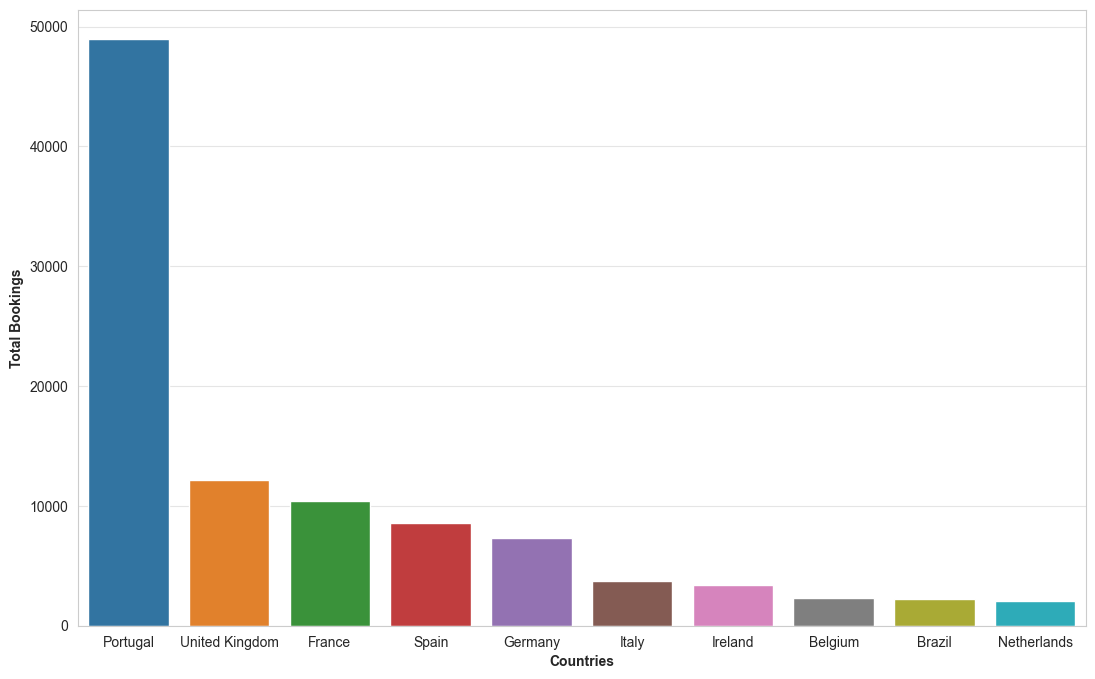

In [20]:
# Create List of top 12
name = cust_country_data["country_name"].head(12)
total= cust_country_data["Total_guests"].head(12)

# Plot Bar chart of countries
sns.set_style("whitegrid")
plt.subplots(figsize=(13,8))
sns.barplot(x= name[0:10],y =total[0:10])
plt.xlabel("Countries",weight="bold")
plt.ylabel("Total Bookings",weight="bold")
plt.grid(alpha = 0.5,axis = "y")

* Most of the customers where from **Portugal**,  **United Kingdom** and *other European countries*. so analyse via heatmap in World Map for better view.

In [34]:
# plot map chart for all customer"s countries
cust_map = px.choropleth(cust_country_data, 
                        locations=cust_country_data["Country"],
                        color= cust_country_data["Total_guests"],
                        hover_name= cust_country_data["Country"],
                        labels={"Total_guests":"Total Bookings"},
                        color_continuous_scale="Turbo")
cust_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
import plotly.graph_objects as go
fig_widget = go.FigureWidget(cust_map)
cust_map

NameError: name 'px' is not defined

![image info](./images/plots/country.png)

#### 4.2 Bookings Count based on Hotel type

Count of bookings based on Type of Hotel (Resort, City Hotel)

In [21]:
df.groupby(["is_canceled"])["hotel"].value_counts()

is_canceled  hotel       
0            City Hotel      46084
             Resort Hotel    28927
1            City Hotel      33079
             Resort Hotel    11120
Name: hotel, dtype: int64

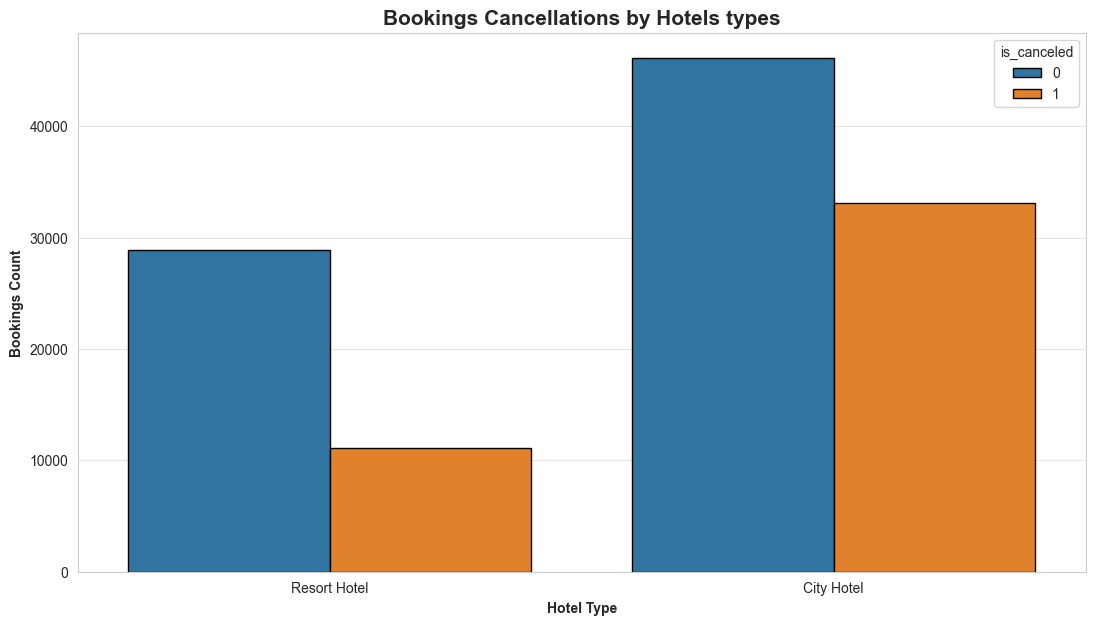

In [22]:
# Plot Barchart for both hotel types
plt.subplots(figsize=(13,7))
sns.set_style("whitegrid")
sns.countplot(x="hotel",hue="is_canceled",data= df,ec = "black")
plt.title("Bookings Cancellations by Hotels types", weight="bold",fontsize=15)
plt.ylabel("Bookings Count", weight = "bold")
plt.xlabel("Hotel Type", weight= "bold")
plt.grid(alpha = 0.5,axis = "y")
plt.show()

**Legend**: **Blue** : *Checked-in*  & **Orange**:  *Cancelled*

The above graphs shows City Hotels had more bookings and cancelations received than Resort Hotel type. 

#### 4.3 Check-ins vs Cancellations 

In [23]:
# Percentage of Canceled and not Canceled 
percentage = df.is_canceled.value_counts(normalize=True)*100
pielabels = ["Checked-in","Canceled"]

In [24]:
# Plot PieChart with Ploty library
f1 = px.pie(values= percentage, names= pielabels, title="Percentage of Check-ins vs cancellation")
f1.update_traces(textposition="inside", textinfo="percent+label")
f1.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
f1.show()

![image info](./images/plots/pie.png)

The above chart shows Checked-In Bookings are only 63% where as Bookings cancelled is 37%

#### 4.3 Which Month is the Most Occupied (Busiest) and Least Occupied with Bookings at the Hotel ? 

Extract Arrvial month and know its booking status

In [24]:
# Group by cancellation status and Months
month_data= df.groupby(["is_canceled"])["arrival_date_month"].value_counts()
month_data

is_canceled  arrival_date_month
0            August                8624
             July                  7907
             May                   7103
             October               6901
             March                 6620
             April                 6560
             June                  6395
             September             6385
             February              5359
             November              4651
             December              4391
             January               4115
1            August                5237
             July                  4737
             May                   4677
             June                  4534
             April                 4518
             October               4246
             September             4115
             March                 3148
             February              2693
             December              2368
             November              2120
             January               1806
Name: ar

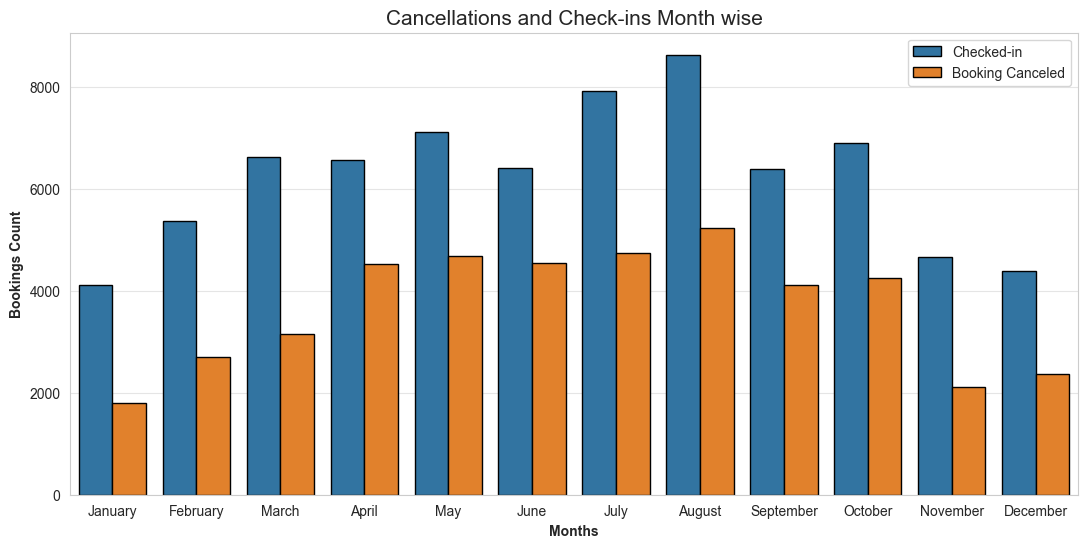

In [25]:
# Month order to arrange the barchart
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df1 = df.copy() # create a copy from main df
# Change values for plotting according to data description
df1["is_canceled"]= np.where(df1["is_canceled"]==0,"Checked-in","Booking Canceled")

# Plot Barchart for month and Bookings
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="arrival_date_month",hue="is_canceled",data= df1, order=months_order,ec = "black")
plt.title("Cancellations and Check-ins Month wise", fontsize=15)
plt.ylabel("Bookings Count", weight = "bold")
plt.xlabel("Months", weight= "bold")
plt.legend(loc="upper right")
plt.grid(alpha = 0.5,axis = "y")
plt.show()

**The above Chart shows:**

* August is the most busiest month in terms of bookings with 11.62% of total bookings.
* January is the lowest bookings month with 4.96% of total bookings.

#### 4.4 Which Year is the Most Occupied (Busiest) and Least Occupied with Bookings at the Hotel ? 

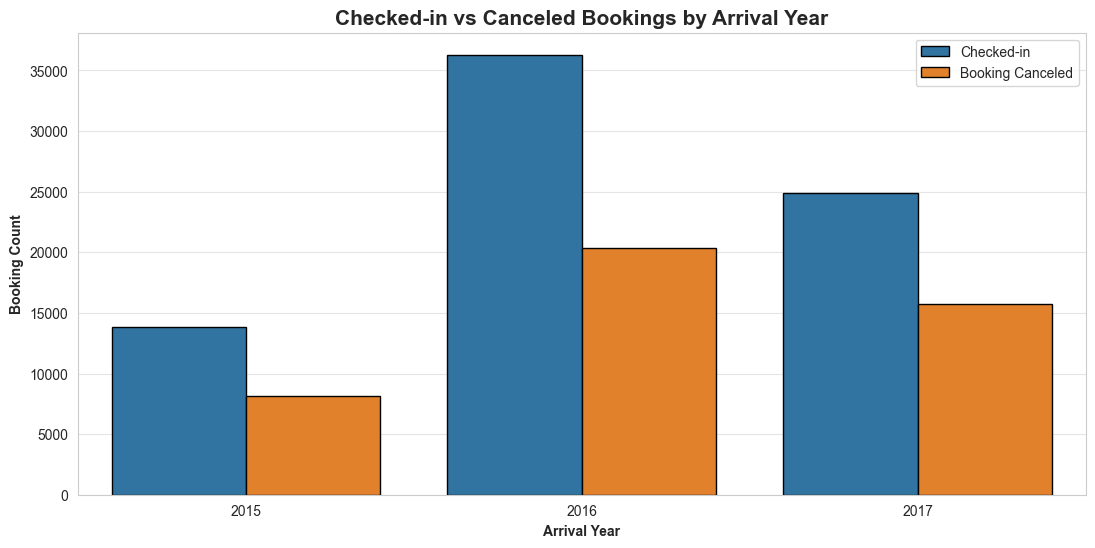

In [26]:
# Plot Barchart for Year and Bookings

sns.set_style("whitegrid")
plt.subplots(figsize=(13,6))
sns.countplot(x="arrival_date_year", hue="is_canceled",data= df1,ec = "black")
plt.title("Checked-in vs Canceled Bookings by Arrival Year",fontsize=15,weight="bold")
plt.xlabel("Arrival Year",weight= "bold")
plt.ylabel("Booking Count",weight= "bold")
plt.legend(loc="upper right")
plt.grid(alpha = 0.5,axis = "y")

**The above Chart shows:**
* 2016 was the most busiest year.
* 2015 was the less occupied year.

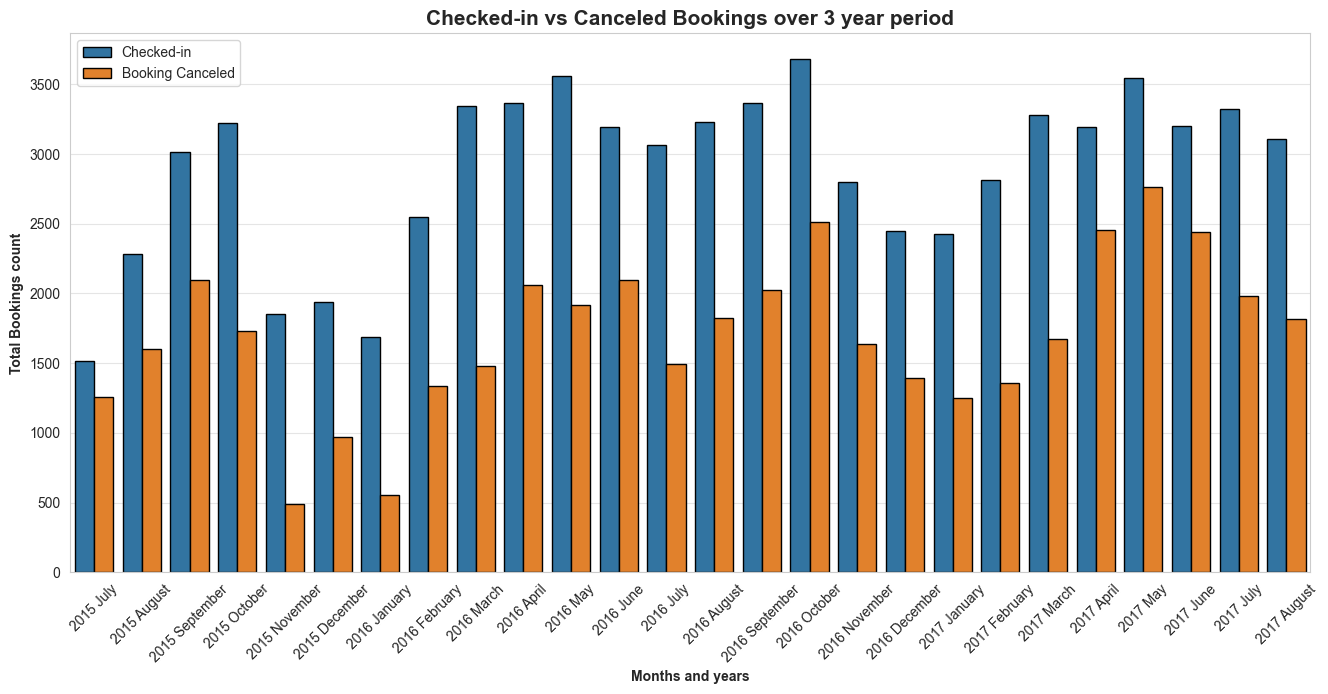

In [27]:
# Concat the arrival year and month
df1["period"] = df1["arrival_date_year"].astype(str) +" "+ df1["arrival_date_month"]

# Plot Period vs Bookings
plt.subplots(figsize=(16,7))
sns.set_style("whitegrid")
sns.countplot(x="period", hue="is_canceled",data= df1,ec = "black")
plt.xticks(rotation=45)
plt.title("Checked-in vs Canceled Bookings over 3 year period",weight= "bold",fontsize= 15)
plt.xlabel("Months and years",weight="bold")
plt.ylabel("Total Bookings count",weight="bold")
plt.legend(loc="upper left")
plt.grid(alpha = 0.5,axis = "y")
plt.show()

**The above Chart shows:**
* Q2 is the most busiest season every year.
* Every year from August to November more bookings where seen.

#### 4.5 Which Hotel type had more percentage of cancellation

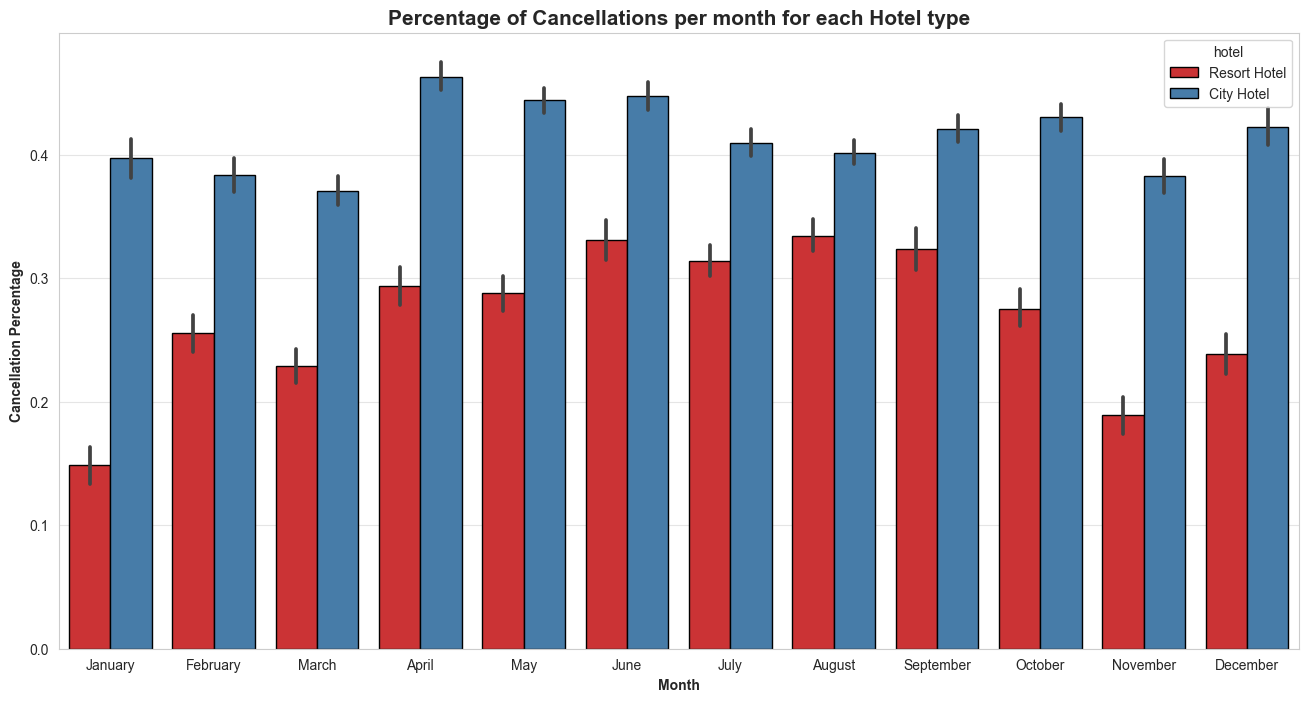

In [28]:
# Plot Month and Cancellations in respect to Hotel type
plt.subplots(figsize=(16,8))
sns.set_style("whitegrid")
sns.barplot(x="arrival_date_month", y="is_canceled",hue="hotel",data = df, order=months_order, palette="Set1",ec = "black")
plt.title("Percentage of Cancellations per month for each Hotel type", weight="bold", fontsize=15)
plt.xlabel("Month",weight="bold")
plt.ylabel("Cancellation Percentage",weight="bold")
plt.grid(alpha = 0.5,axis = "y")
plt.show()

**The above Chart shows:**
* City Hotels had Highest Cancellations in *April* month and Lowest in *September*.
* Resort Hotels had Highest Cancellations in *August* month, and Lowest in *January*.

#### 4.6 What is ADR and its Effects on Bookings and Hotel type?

Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

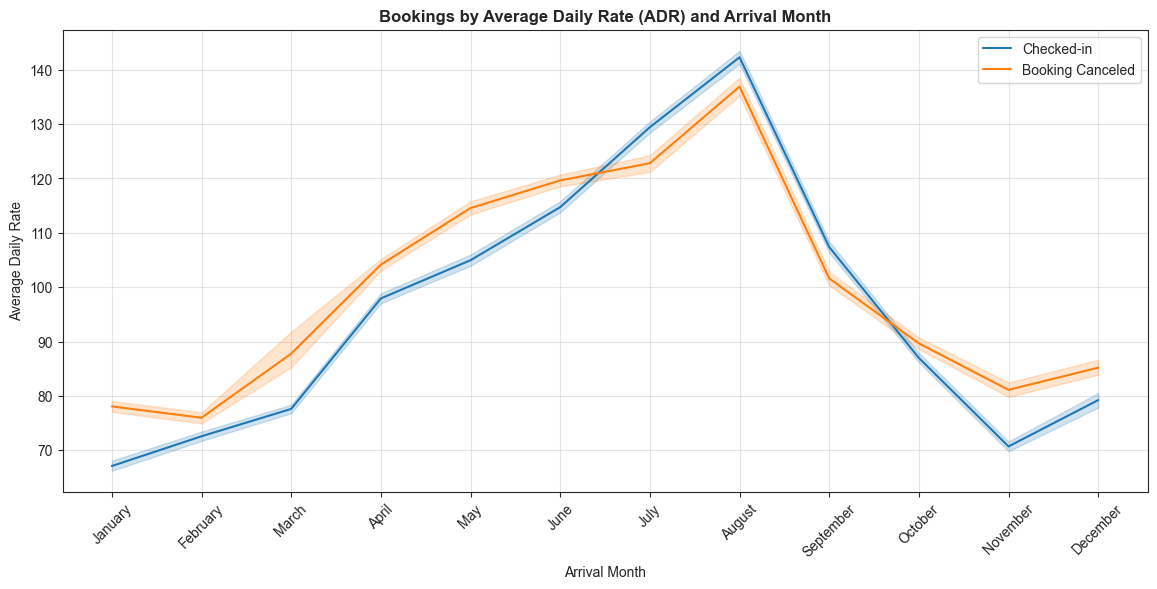

In [29]:
# Arrange the month for plotting
df1["arrival_date_month"] = pd.Categorical(df1["arrival_date_month"], categories=months_order, ordered=True)

# Plot Line Chart
plt.figure(figsize=(14,6))
sns.set_style("ticks")
sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",data=df1)
plt.title("Bookings by Average Daily Rate (ADR) and Arrival Month", weight = "bold")
plt.xlabel("Arrival Month")
plt.ylabel("Average Daily Rate")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(alpha = 0.5)

**The above Chart shows:**
* ADR Average Daily Rate was more for customers who Checked-in (Obvious).
* ADR keeps on Raising in from June to August and drops back after that which means summer season had more demand in Hotel rooms.

#### 4.7 What is the Total Bookings count by each Market Segment customers ?

In [30]:
# Extract Count of Booking types based on Market Segment
df1.groupby("market_segment")["is_canceled"].value_counts()

market_segment  is_canceled     
Aviation        Checked-in            183
                Booking Canceled       52
Complementary   Checked-in            639
                Booking Canceled       89
Corporate       Checked-in           4291
                Booking Canceled      991
Direct          Checked-in          10648
                Booking Canceled     1934
Groups          Booking Canceled    12094
                Checked-in           7697
Offline TA/TO   Checked-in          15880
                Booking Canceled     8302
Online TA       Checked-in          35673
                Booking Canceled    20735
Undefined       Booking Canceled        2
Name: is_canceled, dtype: int64

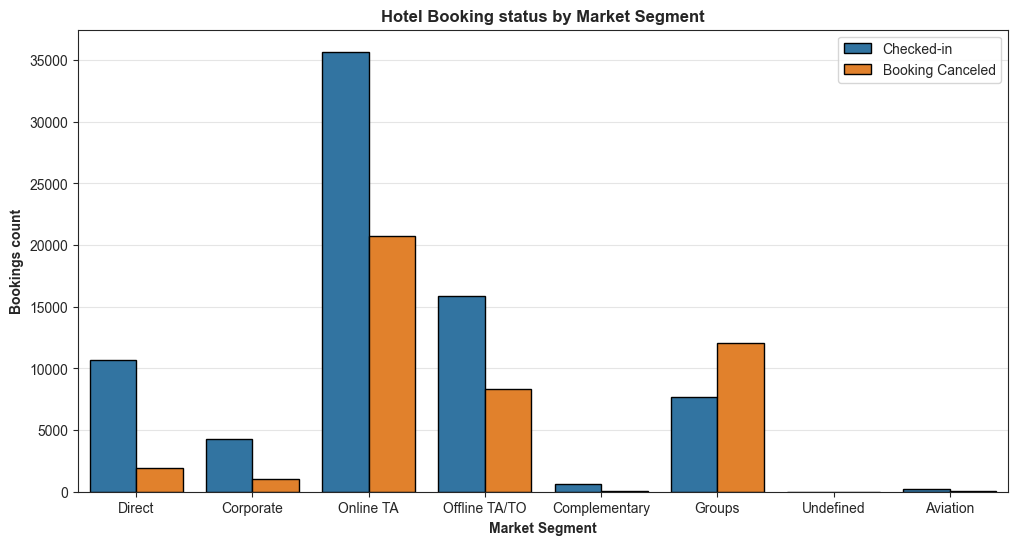

In [31]:
plt.subplots(figsize=(12,6))
sns.countplot(x="market_segment", hue="is_canceled", data=df1,ec = "black")
plt.title("Hotel Booking status by Market Segment",weight= "bold")
plt.xlabel("Market Segment",weight = "bold")
plt.ylabel("Bookings count",weight = "bold")
plt.legend(loc="upper right")
plt.grid(alpha = 0.5,axis = "y")

**The above Chart shows:**
* Online Travel Agencies had more Checked-in bookings and Canceled bookings.
* Offline Travel Agencies, groups and direct market segments are major source of bookings preffered by customers.

#### 4.8 What is the Booking status based on customer type?

In [32]:
# Types of customer types
df1["customer_type"].value_counts(normalize = True)*100

Transient          75.057462
Transient-Party    21.045214
Contract            3.415821
Group               0.481503
Name: customer_type, dtype: float64

In [33]:
# Types of customer types by booking status
df1.groupby("customer_type")["is_canceled"].value_counts()

customer_type    is_canceled     
Contract         Checked-in           2810
                 Booking Canceled     1262
Group            Checked-in            516
                 Booking Canceled       58
Transient        Checked-in          52982
                 Booking Canceled    36494
Transient-Party  Checked-in          18703
                 Booking Canceled     6385
Name: is_canceled, dtype: int64

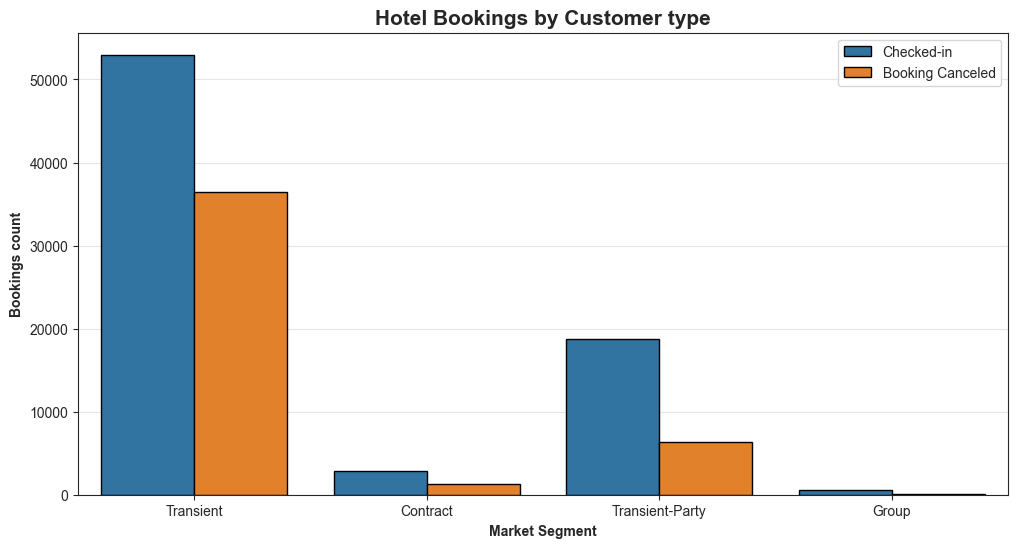

In [34]:
# Plot barchart
plt.subplots(figsize=(12,6))
sns.countplot(x="customer_type", hue="is_canceled", data=df1,ec = "black")
plt.title("Hotel Bookings by Customer type",weight= "bold", fontsize=15)
plt.xlabel("Market Segment",weight = "bold")
plt.ylabel("Bookings count",weight = "bold")
plt.legend(loc="upper right")
plt.grid(alpha = 0.5,axis = "y")

**The above Chart shows:**
* Transient customers had the most bookings.
* Groups customers had lowest bookings.

#### 4.9 What is the Total Bookings count based on the Deposit Type?

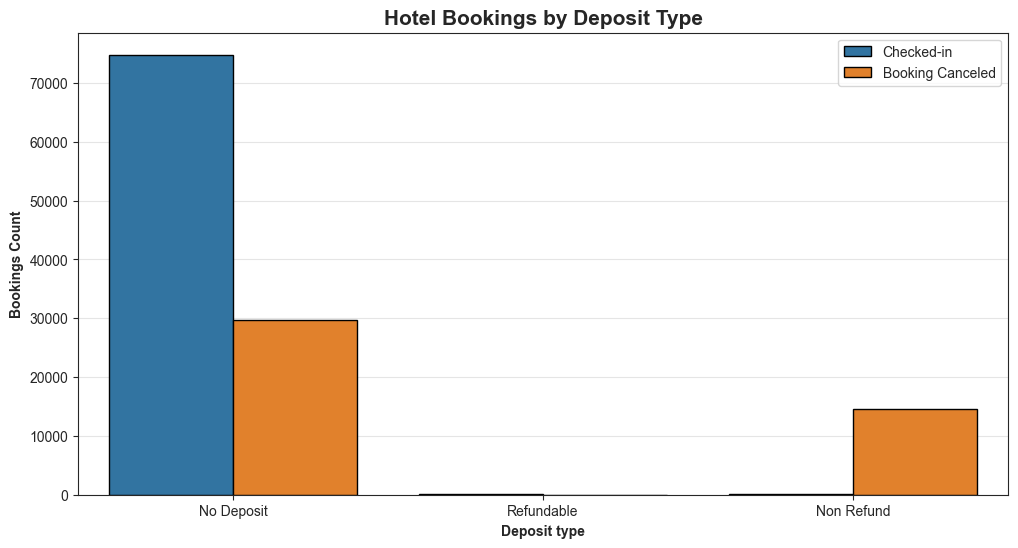

In [35]:
# plot barchart
plt.subplots(figsize=(12,6))
sns.countplot(x= "deposit_type",hue="is_canceled",data=df1,ec = "black")
plt.title("Hotel Bookings by Deposit Type", fontsize = 15,weight = "bold")
plt.xlabel("Deposit type",weight="bold")
plt.ylabel("Bookings Count",weight="bold")
plt.legend(loc="upper right")
plt.grid(alpha = 0.5,axis = "y")

**The above Chart shows:**
* Most of the Cancelations where from no deposit customers.
* Intresting here is the Non refund type customers mostly checked-in.

#### 4.10 What is the Total Bookings count by each Meal type opted by customers ?

In [36]:
# Meal type and Customer count
df1.groupby("meal")["is_canceled"].value_counts()

meal       is_canceled     
BB         Checked-in          57730
           Booking Canceled    34506
FB         Booking Canceled      478
           Checked-in            320
HB         Checked-in           9475
           Booking Canceled     4983
SC         Checked-in           6603
           Booking Canceled     3946
Undefined  Checked-in            883
           Booking Canceled      286
Name: is_canceled, dtype: int64

* BB= Bead and Breakfast only
* FB= Full Board (Breakfast, Lunch and Dinner)
* HB= Half Board (Breakfast and Dinner only)
* SC= Self Catering
* Undefined= No Meal Package choosen

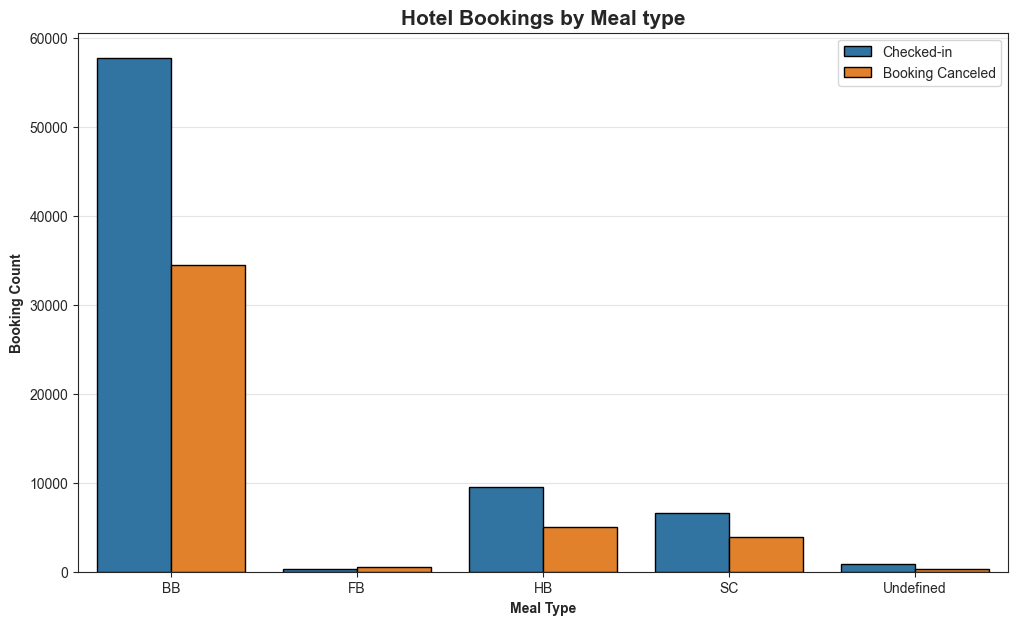

In [37]:
plt.subplots(figsize=(12,7))
sns.countplot(x="meal", hue="is_canceled",data=df1, ec = "black")
plt.title("Hotel Bookings by Meal type", fontsize = 15,weight = "bold")
plt.ylabel("Booking Count", weight="bold")
plt.xlabel("Meal Type", weight="bold")
plt.legend(loc="upper right")
plt.grid(alpha= 0.5, axis="y")

**The above Chart shows:**
* Most of the Bookings where from BB which is included in room rate.
* Very less people opted from Full Board so it has lowest bookings.

#### 4.11 How many Bookings were done based on Guest's Freqency Type?

In [38]:
# Replace values for is_repeated guest Column for plotting
df1["is_repeated_guest"]= np.where(df1["is_repeated_guest"]==0,"Not_Repeated_Guest","Repeated_Guest")
df1["is_repeated_guest"].value_counts()

Not_Repeated_Guest    115455
Repeated_Guest          3755
Name: is_repeated_guest, dtype: int64

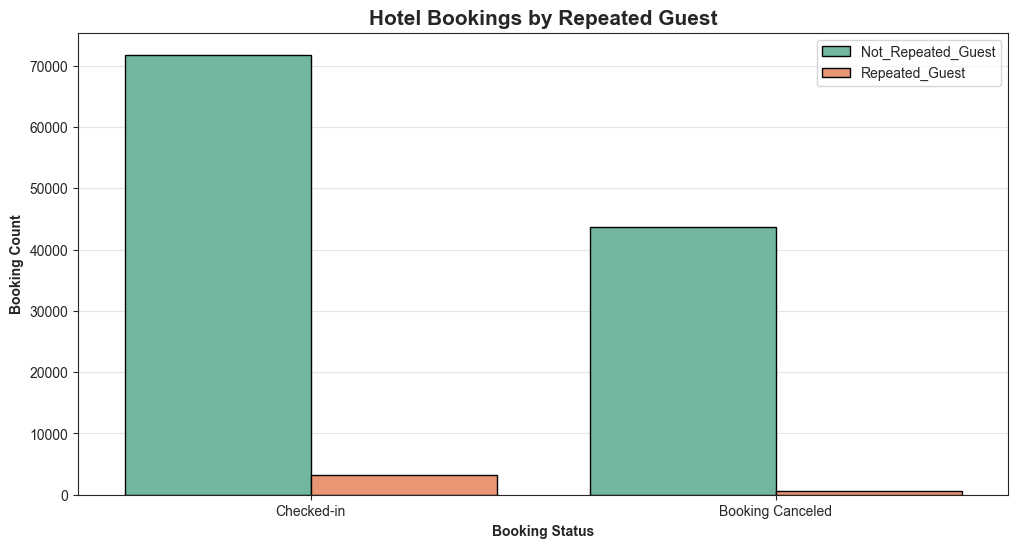

In [39]:
plt.subplots(figsize=(12,6))
sns.countplot(x="is_canceled", hue="is_repeated_guest",data=df1,ec = "black", palette="Set2")
plt.title("Hotel Bookings by Repeated Guest", fontsize = 15,weight = "bold")
plt.ylabel("Booking Count", weight="bold")
plt.legend(loc="upper right")
plt.xlabel("Booking Status", weight="bold")
plt.grid(alpha = 0.5,axis = "y")

The above Chart shows:
* Not Repeated customers and more than Repeated customers

#### 4.12 What is the Total Bookings count by Required car space opted by customers ?

In [40]:
df1.groupby("required_car_parking_spaces")["is_canceled"].value_counts()

required_car_parking_spaces  is_canceled     
0                            Checked-in          67602
                             Booking Canceled    44199
1                            Checked-in           7376
2                            Checked-in             28
3                            Checked-in              3
8                            Checked-in              2
Name: is_canceled, dtype: int64

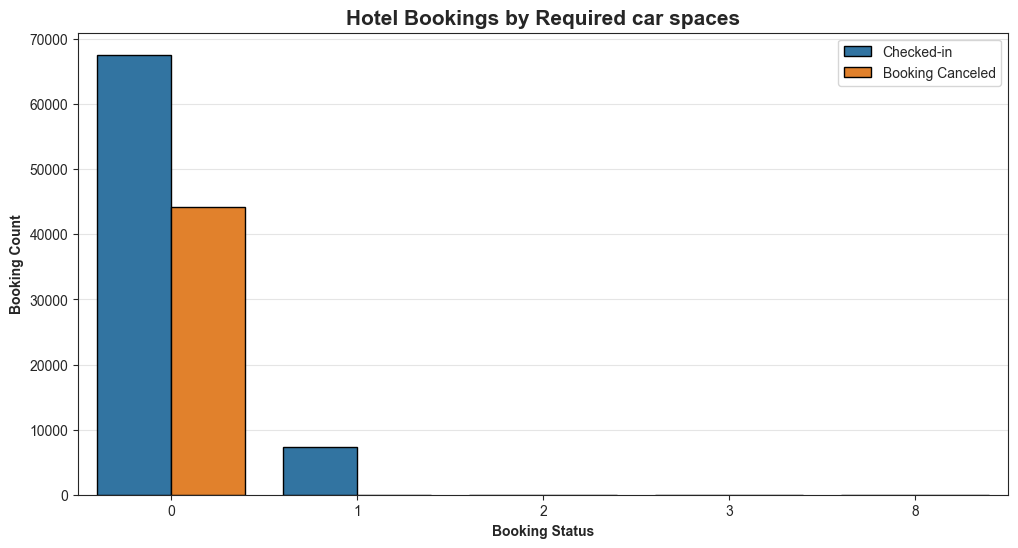

In [41]:
plt.subplots(figsize=(12,6))
sns.countplot(x="required_car_parking_spaces", hue="is_canceled",data=df1,ec = "black")
plt.title("Hotel Bookings by Required car spaces", fontsize = 15,weight = "bold")
plt.ylabel("Booking Count", weight="bold")
plt.xlabel("Booking Status", weight="bold")
plt.legend(loc="upper right")
plt.grid(alpha = 0.5,axis = "y")

**The above Chart shows:**
* Most of the Bookings where customer didn"t opt for car parkings.
* People where mostly travellers who travel through taxi or other means of transport so less need of car parkings

#### 4.13 What is the Money spent by customers based Market type

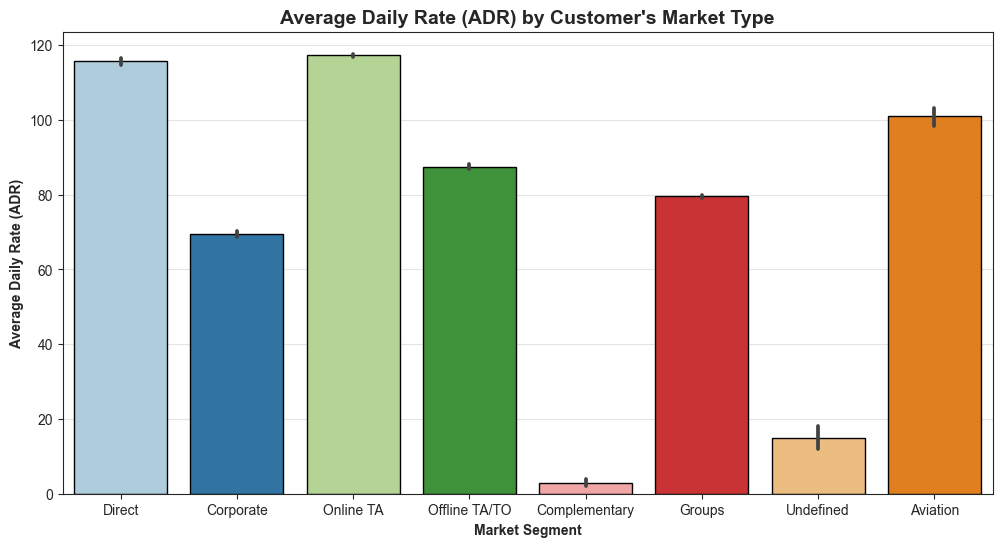

In [42]:
plt.figure(figsize=(12,6))
sns.set_style("ticks")
ax = sns.barplot(x= "market_segment",y = "adr",data=df1,palette= "Paired",ec = "black")
ax.set_title("Average Daily Rate (ADR) by Customer's Market Type", fontsize = 14,weight = "bold")
ax.set_xlabel("Market Segment",weight = "bold")
ax.set_ylabel("Average Daily Rate (ADR)",weight = "bold")
plt.grid(alpha = 0.5,axis = "y")

**The above Chart shows:**
* ADR for Online Travel agencies where highest.
* Corporates had low average daily price.
* And obviously complimentary people spent the lowest.

#### 4.14 Nights spent by customers by Hotel types

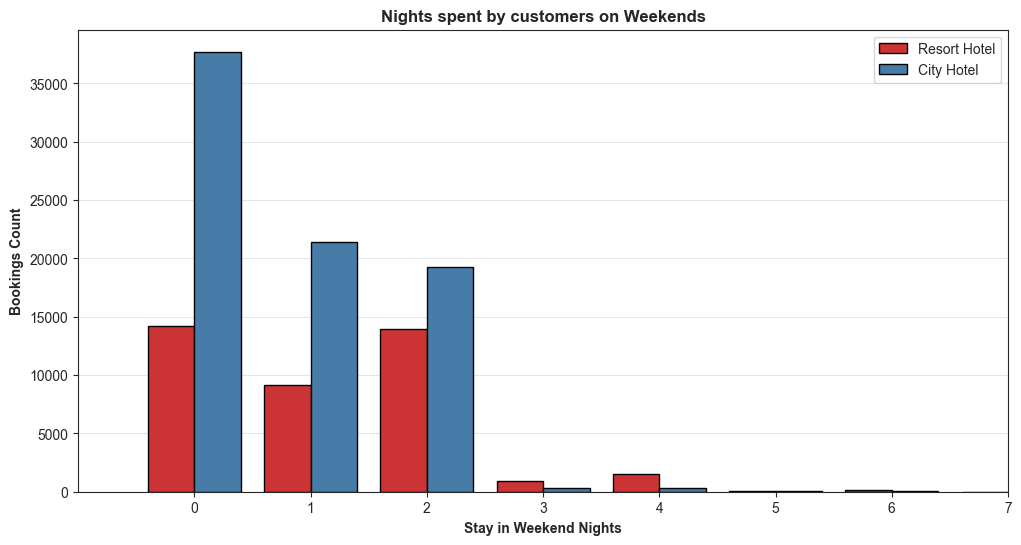

In [43]:
plt.subplots(figsize=(12,6))
sns.countplot(x="stays_in_weekend_nights", hue="hotel", data=df1, palette="Set1",ec="black")
plt.title("Nights spent by customers on Weekends",weight="bold")
plt.xlabel("Stay in Weekend Nights",weight="bold")
plt.ylabel("Bookings Count", weight="bold")
plt.legend(loc="upper right")
plt.xlim(-1,7)
plt.grid(alpha=0.5,axis="y")

**The above Chart shows:**
* Most of the Bookings where people stayed in hotel for zero days as they may have booked for day packages in City hotels.
* Second most bookings where from people who stayed 2 days as weekends in Resort hotels.
* Second most Bookings of city hotels where of 1 day stays.

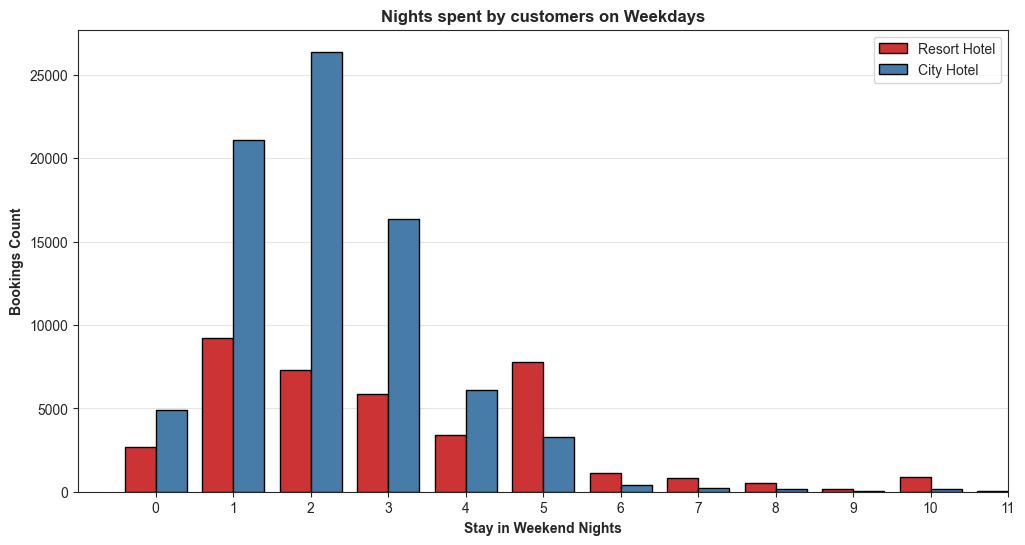

In [44]:
plt.subplots(figsize=(12,6))
sns.countplot(x="stays_in_week_nights", hue="hotel", data=df1, palette="Set1",ec="black")
plt.title("Nights spent by customers on Weekdays",weight="bold")
plt.xlabel("Stay in Weekend Nights",weight="bold")
plt.ylabel("Bookings Count", weight="bold")
plt.legend(loc="upper right")
plt.xlim(-1,11)
plt.grid(alpha=0.5,axis="y")

**The above Chart shows:**
* Most of the Bookings where from People who stayed 2 days in city hotels.
* Very less people Stayed more than 6 days.
* Resorts had many 5 days bookings on weekdays

#### 4.15 What are the total Bookings by each Distribution channels

In [45]:
# Count of ditribution channel"s bookings
df1.groupby(["distribution_channel"])["is_canceled"].value_counts()

distribution_channel  is_canceled     
Corporate             Checked-in           5184
                      Booking Canceled     1467
Direct                Checked-in          12056
                      Booking Canceled     2555
GDS                   Checked-in            156
                      Booking Canceled       37
TA/TO                 Checked-in          57614
                      Booking Canceled    40136
Undefined             Booking Canceled        4
                      Checked-in              1
Name: is_canceled, dtype: int64

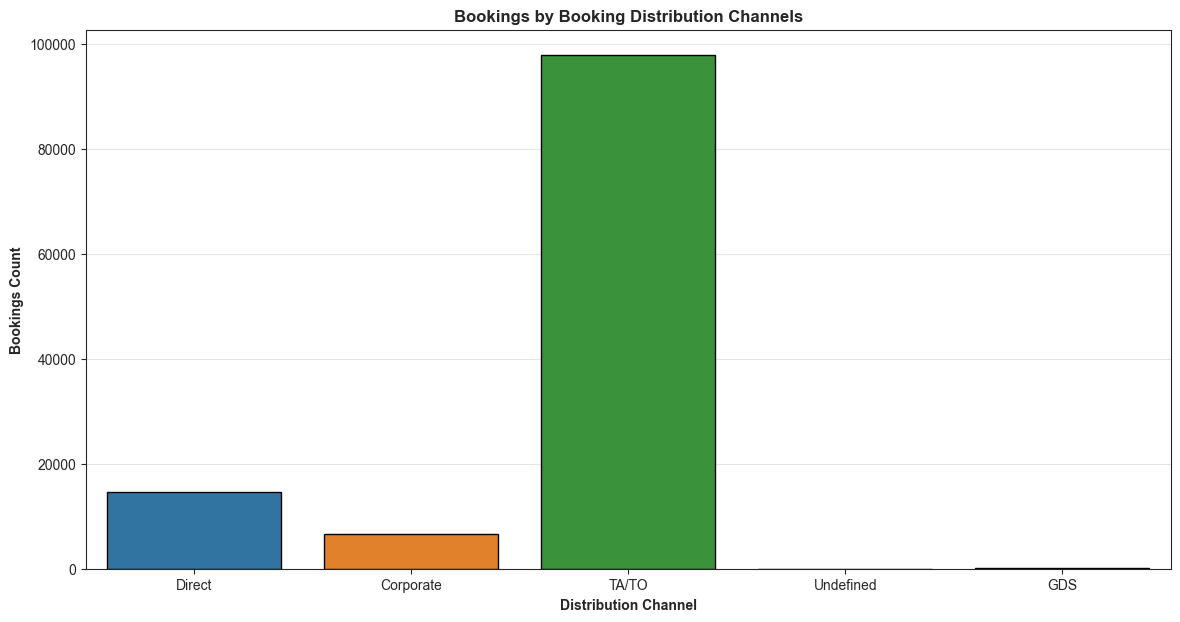

In [46]:
# Plot BarCharts
plt.subplots(figsize=(14,7))
sns.countplot(x="distribution_channel",data=df1, ec="black")
plt.title("Bookings by Booking Distribution Channels",weight="bold")
plt.xlabel("Distribution Channel",weight="bold")
plt.ylabel("Bookings Count", weight="bold")
plt.grid(alpha=0.5,axis="y")

**The above Chart shows:**
* Most of the Bookings where from TA/TO which are travel agencies and travel organisers.
* Second most bookings by Direct method and followed by Corporate.

#### 4.16 Relationship between Lead time and Booking status.

In [47]:
# Convert lead time to days for plotting
df1["lead_time"]= df1["lead_time"]/24

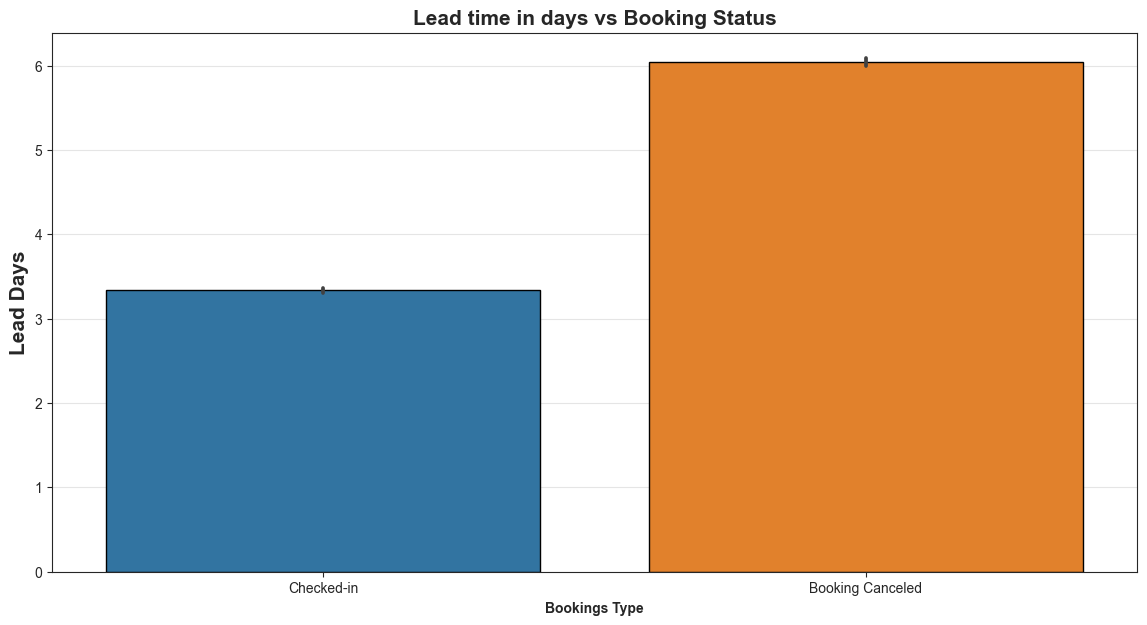

In [48]:
# plot BarChart
plt.subplots(figsize=(14,7))
sns.barplot(x="is_canceled",y="lead_time",data=df1,ec="black")
plt.title("Lead time in days vs Booking Status", weight="bold",fontsize=15)
plt.xlabel("Bookings Type",weight="bold")
plt.ylabel("Lead Days",weight="bold",fontsize=15)
plt.grid(alpha=0.5,axis="y")

**The above Chart shows:**
* Most of the Bookings where people Cancelled were booked prior to 4 days.
* Recent bookings where mostly Checked-in (may be Local bookings).
* This can be the most important feature which can have effects of cancellations

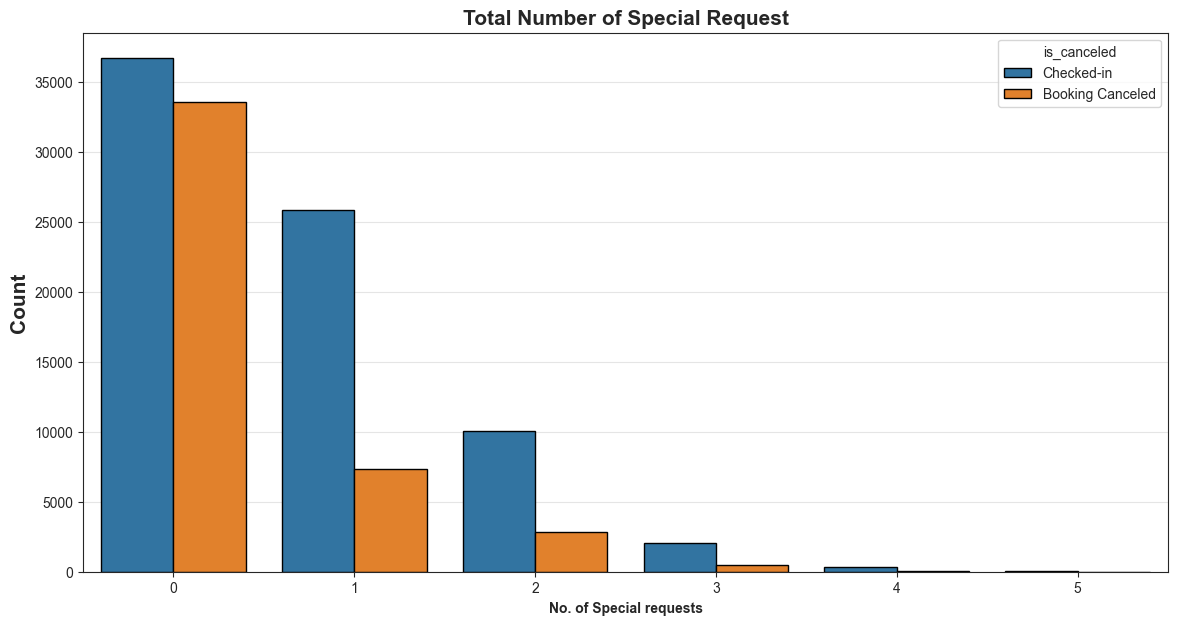

In [49]:
# plot BarChart
plt.subplots(figsize=(14,7))
sns.countplot(x="total_of_special_requests",hue="is_canceled", data=df1,ec="black")
plt.title("Total Number of Special Request", weight="bold",fontsize=15)
plt.xlabel("No. of Special requests",weight="bold")
plt.ylabel("Count",weight="bold",fontsize=15)
plt.grid(alpha=0.5,axis="y")

**The above chart shows**
* People with zero request cancelled more than the people with any special request.
* People with 1+ special request had checked-in more.
* We get insights that special request has impact in booking status too.

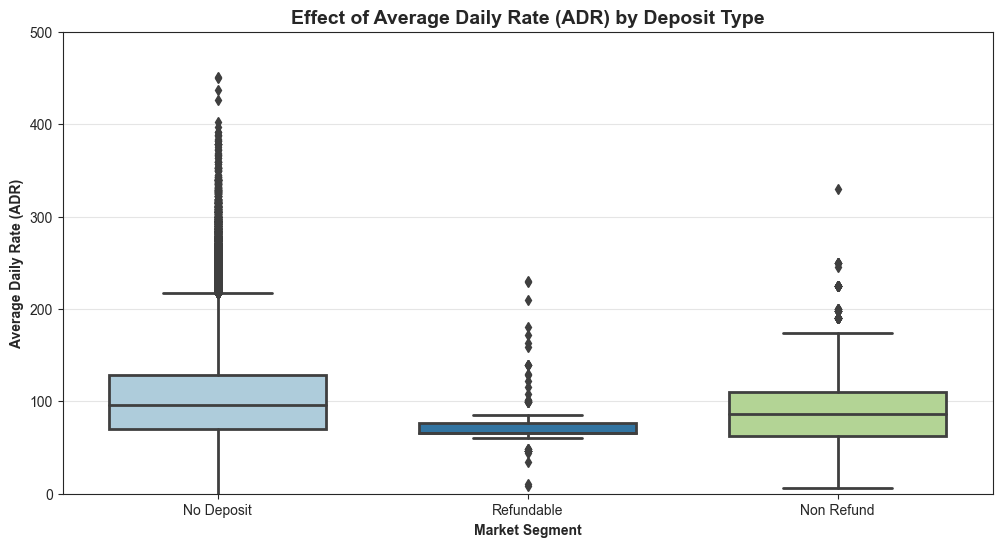

In [50]:
plt.subplots(figsize=(12,6))
sns.set_style('ticks')
ax = sns.boxplot(x= 'deposit_type',y = 'adr',data=df,width = 0.7,linewidth= 2,palette= 'Paired')
ax.set_title("Effect of Average Daily Rate (ADR) by Deposit Type", fontsize = 14,weight = 'bold')
ax.set_xlabel("Market Segment",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
plt.grid(alpha = 0.5,axis = 'y')
ax.set(ylim=(0,500));

**The above Chart shows:**
* No Deposit people spends more than Refundable and non Refund deposit type 

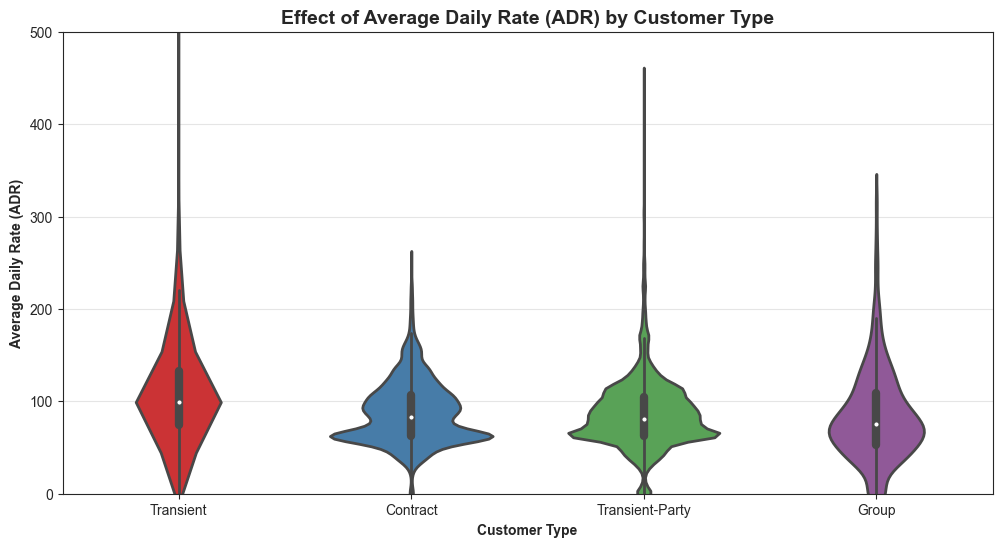

In [51]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.violinplot(x= 'customer_type',y = 'adr',data=df,width = 0.7,linewidth= 2,palette= 'Set1')
ax.set_title("Effect of Average Daily Rate (ADR) by Customer Type", fontsize = 14,weight = 'bold')
ax.set_xlabel("Customer Type",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
plt.grid(alpha = 0.5,axis = 'y')
ax.set(ylim=(0,500));

**The above Chart shows:**
* Transient customers spends more
* Contract customers spends very less compared to other customer types

In [53]:
############ EDA+ FEATURE ENGINEERING WILL BE UPLOADED IN REPO #############